In [1]:
!conda install scipy netcdf4 numpy matplotlib basemap basemap-data-hires --yes

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda:
#
basemap                   1.1.0                    py36_2    conda-forge
basemap-data-hires        1.1.0                         0    conda-forge
matplotlib                2.1.0                    py36_0    conda-forge
netcdf4                   1.3.0                    py36_0    conda-forge
numpy                     1.13.3          py36_blas_openblas_200  [blas_openblas]  conda-forge
scipy                     0.19.1          py36_blas_openblas_202  [blas_openblas]  conda-forge


In [2]:
%matplotlib inline

In [3]:
from netCDF4 import MFDataset, MFTime, num2date
import numpy as np
import matplotlib.pyplot as plt

In [4]:
base = "http://data.ceda.ac.uk/neodc/casix/seawifs_plankton/data/monthly/PSC_monthly_{0}.nc"

In [5]:
urls = [ base.format(yr) for yr in range(1998, 2007, 1)]

In [6]:
rootgrp = MFDataset(urls, aggdim = 'time')

In [7]:
MFtime = MFTime(rootgrp.variables['time'])
time = num2date(MFtime[:], 'days since 1998-01-01')

In [8]:
lats = rootgrp['latitude'][:]
lons = rootgrp['longitude'][:]
lat_bnds, lon_bnds = [55.5, 57], [-3.5, 0]
lat_inds = np.where((lats > lat_bnds[0]) & (lats < lat_bnds[1]))[0]
lon_inds = np.where((lons > lon_bnds[0]) & (lons < lon_bnds[1]))[0]

In [9]:
plankton = rootgrp.variables['phytoplankton_size_class']
roi = plankton[:, lat_inds, lon_inds]

In [10]:
roi_mean = np.mean(roi, (1,2))
roi_sum = np.sum(roi, (1,2))

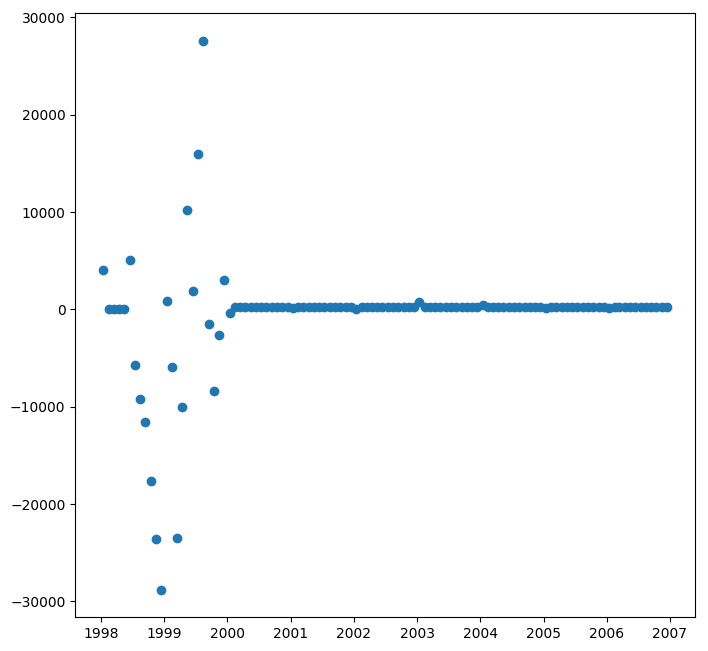

In [11]:
fig = plt.figure(figsize=(8, 8), dpi= 100)
plt.plot_date(time, roi_sum)